In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [26]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX



PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2022-07-12 02:58:37--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-07-12 02:58:37--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 25.6M 2s
    50K .......... .......... .......... .......... ..........  0%

In [27]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [29]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


In [33]:
import pathlib
from google.colab import drive

drive.mount('/content/gdrive')
dataset_url = "/content/gdrive/MyDrive/For Sidang"
data_dir = pathlib.Path(dataset_url)

Mounted at /content/gdrive


In [34]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6757


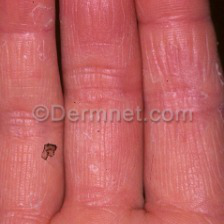

In [35]:
skinDrawsinnes = list(data_dir.glob('Eczema/*'))
PIL.Image.open(str(skinDrawsinnes[0]))

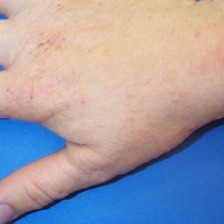

In [36]:
PIL.Image.open(str(skinDrawsinnes[1]))

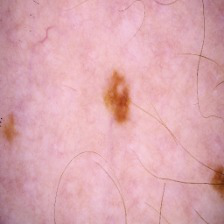

In [37]:
skinDrawsinnes2 = list(data_dir.glob('Melanoma/*'))
PIL.Image.open(str(skinDrawsinnes2[0]))

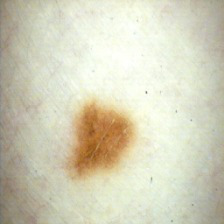

In [38]:
PIL.Image.open(str(skinDrawsinnes2[1]))

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6757 files belonging to 11 classes.
Using 5406 files for training.


In [53]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6757 files belonging to 11 classes.
Using 1351 files for validation.


In [42]:
class_names = train_ds.class_names
print(class_names)

['Basal Cell Carcinoma', 'Benign Keratosis-like Lesions (BKL)', 'Dermatitis', 'Eczema', 'Melanoma', 'Other', 'Psoriasis', 'Seborrheic Keratoses and other Benign Tumors', 'Warts Molluscum and other Viral Infections', '_Melanocytic Nevi (NV)', '_Tinea Ringworm Candidiasis and other Fungal']


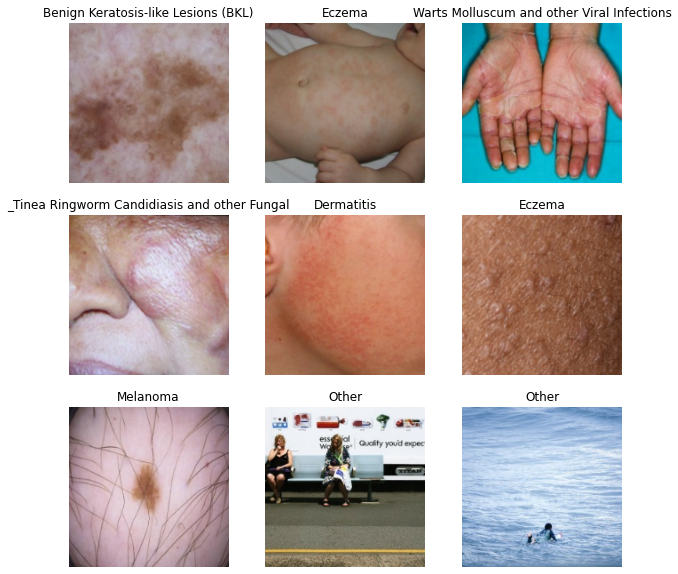

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [44]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [45]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [55]:
normalization_layer = layers.Rescaling(1./255)

In [56]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0661438 0.70111996


In [57]:
num_classes = 11

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [60]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs = epochs
)

Epoch 1/10
169/169 [==============================] - 343s 2s/step - loss: 1.8606 - accuracy: 0.3317 - val_loss: 1.4385 - val_accuracy: 0.4611
Epoch 2/10
169/169 [==============================] - 179s 1s/step - loss: 1.4023 - accuracy: 0.4867 - val_loss: 1.2972 - val_accuracy: 0.5381
Epoch 3/10
169/169 [==============================] - 180s 1s/step - loss: 1.1889 - accuracy: 0.5607 - val_loss: 1.2009 - val_accuracy: 0.5685
Epoch 4/10
169/169 [==============================] - 179s 1s/step - loss: 1.0085 - accuracy: 0.6321 - val_loss: 1.1407 - val_accuracy: 0.6084
Epoch 5/10
169/169 [==============================] - 181s 1s/step - loss: 0.8814 - accuracy: 0.6761 - val_loss: 1.2040 - val_accuracy: 0.5825
Epoch 6/10
169/169 [==============================] - 180s 1s/step - loss: 0.7800 - accuracy: 0.7135 - val_loss: 1.1729 - val_accuracy: 0.6129
Epoch 7/10
169/169 [==============================] - 181s 1s/step - loss: 0.6905 - accuracy: 0.7521 - val_loss: 1.1637 - val_accuracy: 0.6151

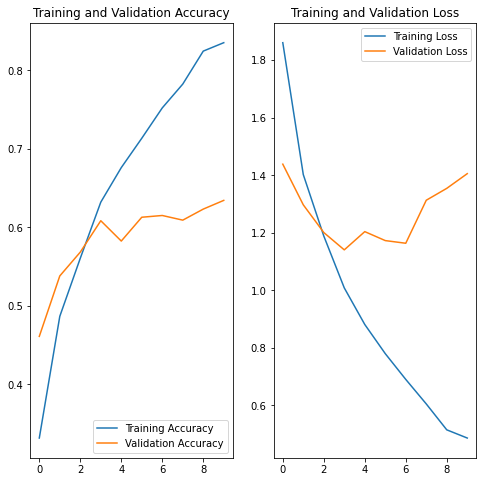

In [61]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

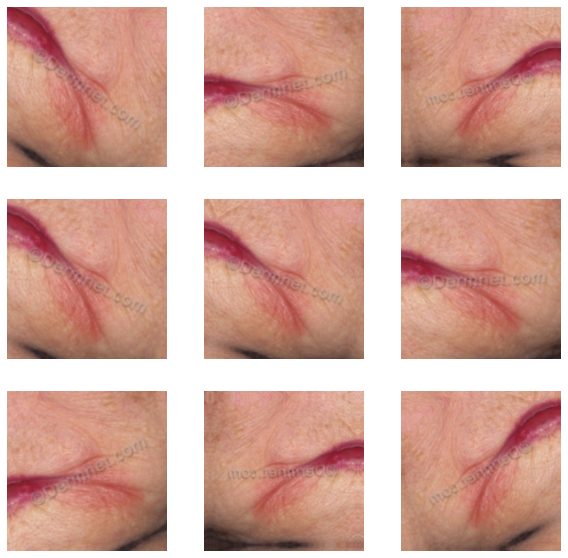

In [63]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [64]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
169/169 [==============================] - 209s 1s/step - loss: 1.9095 - accuracy: 0.3004 - val_loss: 1.6985 - val_accuracy: 0.4145
Epoch 2/15
169/169 [==============================] - 209s 1s/step - loss: 1.5448 - accuracy: 0.4253 - val_loss: 1.5666 - val_accuracy: 0.4782
Epoch 3/15
169/169 [==============================] - 206s 1s/step - loss: 1.3637 - accuracy: 0.5013 - val_loss: 1.3258 - val_accuracy: 0.5078
Epoch 4/15
169/169 [==============================] - 208s 1s/step - loss: 1.3110 - accuracy: 0.5224 - val_loss: 1.2838 - val_accuracy: 0.5574
Epoch 5/15
169/169 [==============================] - 205s 1s/step - loss: 1.2643 - accuracy: 0.5416 - val_loss: 1.2866 - val_accuracy: 0.5440
Epoch 6/15
169/169 [==============================] - 207s 1s/step - loss: 1.2002 - accuracy: 0.5572 - val_loss: 1.2169 - val_accuracy: 0.5788
Epoch 7/15
169/169 [==============================] - 208s 1s/step - loss: 1.1587 - accuracy: 0.5764 - val_loss: 1.1938 - val_accuracy: 0.5751

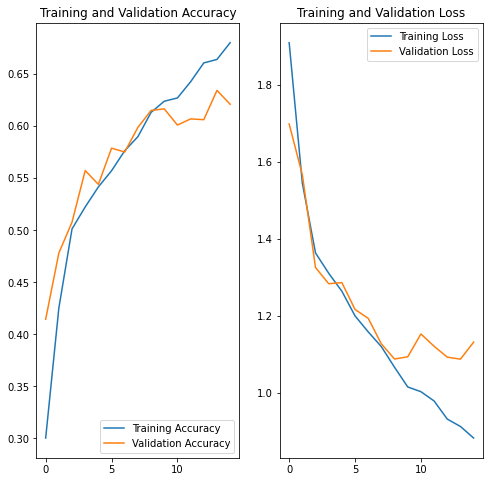

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
import pathlib

model.save("model.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("/content/tflite")
tflite_model_file.write_bytes(tflite_model)

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp_fh5nwt1/assets


INFO:tensorflow:Assets written to: /tmp/tmp_fh5nwt1/assets


In [81]:
#now that we have our neural network trained with tensorflow and keras, we can export it 
saved_model_dir = '' #means current directory
tf.saved_model.save(model, saved_model_dir) #saves to the current directory

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) 
tflite_model = converter.convert() #converts our model into a .tflite model which flutter uses for ondevice machine learning

with open('model.tflite', 'wb') as f: #to write the converted model into a file, written as binary so add 'wb' instead of 'w'
  f.write(tflite_model)

#use below codes to download files locally if using google colab
from google.colab import files
files.download('model.tflite')

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: /tmp/tmp74__rbql/assets


INFO:tensorflow:Assets written to: /tmp/tmp74__rbql/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>